In [115]:
import pandas as pd
import sklearn
import numpy as np

In [116]:
dataset = pd.read_csv('gpa_study_hours.csv')

In [117]:
print("Keys of dataset:\n", dataset.keys())

Keys of dataset:
 Index(['gpa', 'study_hours'], dtype='object')


In [118]:
# displays first 5 rows
dataset.head()

,gpa,study_hours
0,4.00,10.0
1,3.80,25.0
2,3.93,45.0
3,3.40,10.0
4,3.20,4.0


In [119]:
# displays last 5 rows
dataset.tail()

,gpa,study_hours
188,3.60,24.0
189,3.70,12.0
190,3.84,15.0
191,3.80,10.0
192,3.10,15.0


In [120]:
# displays all columns and their datatypes
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   gpa          193 non-null    float64
 1   study_hours  193 non-null    float64
dtypes: float64(2)
memory usage: 3.1 KB


In [121]:
# overview of the values each column contains
dataset.describe()

,gpa,study_hours
count,193.000000,193.000000
mean,3.586166,17.476684
std,0.285482,11.408980
min,2.600000,2.000000
25%,3.400000,10.000000
50%,3.620000,15.000000
75%,3.800000,20.000000
max,4.300000,69.000000


In [122]:
print("gpa:", dataset['gpa'])

gpa: 0      4.00
1      3.80
2      3.93
3      3.40
4      3.20
       ... 
188    3.60
189    3.70
190    3.84
191    3.80
192    3.10
Name: gpa, Length: 193, dtype: float64


In [123]:
print("study hours:", dataset['study_hours'])

study hours: 0      10.0
1      25.0
2      45.0
3      10.0
4       4.0
       ... 
188    24.0
189    12.0
190    15.0
191    10.0
192    15.0
Name: study_hours, Length: 193, dtype: float64


In [124]:
print("Shape of gpa:",dataset['gpa'].shape)

Shape of gpa: (193,)


In [125]:
print("Shape of study hours:",dataset['study_hours'].shape)

Shape of study hours: (193,)


In [126]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset['gpa'], dataset['study_hours'], random_state=0)

In [127]:
print("X_train shape: ",X_train.shape)
print("y_train shape: ",y_train.shape)

X_train shape:  (144,)
y_train shape:  (144,)


In [128]:
print("X_test shape: ",X_test.shape)
print("y_test shape: ",y_test.shape)

X_test shape:  (49,)
y_test shape:  (49,)


In [129]:
print(type(X_train))
print(type(y_train))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [130]:
X_train = X_train.to_frame()
#y_train = y_train.to_frame()

In [131]:
print(type(X_train))
print(type(y_train))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [132]:
print(X_train.isnull().sum())

gpa    0
dtype: int64


In [133]:
# Remove rows with missing values from X_train
X_train = X_train.dropna()

# Match y_train with the remaining rows in X_train
y_train = y_train.loc[X_train.index]

In [134]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

In [135]:
X_train=np.array(X_train).reshape(-1,1)

In [136]:

knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [137]:
X_new=np.array([[5,2.9,1,0.2]])
print("X_new.shape:",X_new.shape)

X_new.shape: (1, 4)


In [138]:
# # Assuming X_new is your new data
# # Ensure X_new has the same preprocessing as X_train (label encoding, missing value handling, etc.)
# # Convert X_new to a 2D array if it's a DataFrame
# X_new_array = X_new.values
X_new=np.array(X_new).reshape(-1,1)

# Predict using the trained model
predictions = knn.predict(X_new)

# Print the predictions
print("Predictions:", predictions)
print("Predicted gpas:", dataset['gpa'][predictions])

# predictions = []
# for instance in X_new:
#     prediction = knn.predict([instance])  # Reshape instance to match the model's expected input
#     predictions.append(prediction)

# # Convert predictions to a numpy array for easier indexing
# predictions = np.array(predictions)
# print("Predictions:", predictions)
# print("Predicted gpas:", dataset['gpa'][predictions])

# prediction=knn.predict(X_new)
# print("Predictiion:",prediction)
# print("Predicted gpa:", dataset['gpa'][prediction])

Predictions: [10.  8.  7.  7.]
Predicted gpas: 10    3.3
8     3.7
7     3.4
7     3.4
Name: gpa, dtype: float64


In [139]:
X_test=np.array(X_test).reshape(-1,1)
y_pred = knn.predict(X_test)
print("Test set predictions: \n",y_pred)

Test set predictions: 
 [ 6. 18. 10. 10.  6.  4. 10. 10. 10. 10.  6. 10. 15. 10.  4. 20. 10.  8.
  7.  8.  5. 10.  8.  4.  7. 18. 15. 20.  4.  5.  6.  7. 15. 15. 10. 15.
 20.  8. 18. 18. 20. 10.  4.  9. 10. 20.  6. 10. 10.]


In [140]:
print("Test set score:{:.2f}".format(np.mean(y_pred==y_test)))

Test set score:0.08


In [141]:
from sklearn.linear_model import LinearRegression

# Create a LinearRegression model
regressor = LinearRegression()

# Train the model
regressor.fit(X_train, y_train)

# Make predictions
y_pred = regressor.predict(X_test)

# Calculate the regression score (e.g., R^2)
regression_score = regressor.score(X_test, y_test)

print("Regression score (R^2): {:.2f}".format(regression_score))


Regression score (R^2): -0.03


In [142]:
# print("Test set score:{:.2f}".format(knn.score(X_test,y_test)))

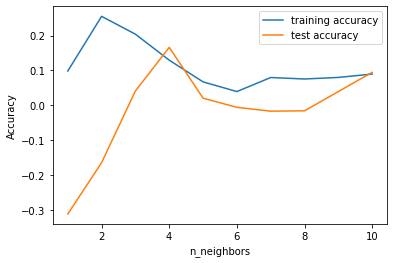

In [147]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor  # Import the KNeighborsRegressor class
from sklearn.metrics import r2_score
training_accuracy=[]
test_accuracy=[]
#neighbors_settings=range(1,11)
for n_neighbors in neighbors_settings:
    knn = KNeighborsRegressor(n_neighbors=n_neighbors)  # Use KNeighborsRegressor for regression
    knn.fit(X_train, y_train)
    training_accuracy.append(r2_score(y_train, knn.predict(X_train)))
    test_accuracy.append(r2_score(y_test, knn.predict(X_test)))
plt.plot(neighbors_settings,training_accuracy,label="training accuracy")
plt.plot(neighbors_settings,test_accuracy,label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_neighbors")
plt.legend()

